## Socialcops Challenge

#### Working with CMO_MSP_Mandi Yearly Dataset

#### 1. Import required packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

# Data wrangling
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pyplot as plt
import seaborn as sns


import os

# pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style = 'ticks', context = 'poster')
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
# Print version of modules
def version(package_name: str, import_as):
    return ("{} version: {}".format(package_name, import_as.__version__))

In [3]:
print(version('Pandas', pd))
print(version('Numpy', np))
print(version('Seaborn', sns))

Pandas version: 0.23.4
Numpy version: 1.15.4
Seaborn version: 0.9.0


We have successfully imported all the required packages and libraries. Now, it's time to <i>load the dataset</i>.

#### 2. Load the dataset

The data we are going to work on is inside the <i>CMO_MSP_Mandi</i> csv file. You can find this file inside the <i>'data/'</i> folder. This dataset contains yearly minimum support price ('msprice') of different commodities.

<b>Minimum Support Price: </b>Minimum Support Price or MSP is an Agriculture product price set by the Government of India to purchase directly from the farmer. This rate is to safeguard the farmer to a minimum profit for the harvest, if the open market has lesser price than the cost incurred.

<b>Commodity: </b>A commodity is an economic good that can be bought and sold, such as copper or coffee.

The main attributes or features of the dataset are:
- <b>commodity</b>: contains the name of the commodity
- <b>year</b>
- <b>Type</b>: contains the type of crop
- <b>msprice</b>: contains minimum support price
- <b>msp_filter</b>

In [4]:
# Get current working directory
def get_cwd():
    return os.getcwd()

# Read the dataset
def read_dataset(filename):
    dataset_path = os.chdir(get_cwd() + '\\data')
    data = os.path.join(get_cwd() , filename)
    return (pd.read_csv(data))

In [5]:
# Look at the 'cmo_yearly' dataset
cmo_yearly = read_dataset("CMO_MSP_Mandi.csv")
cmo_yearly.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.00000,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.00000,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.00000,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.00000,1
4,BAJRI,2012,Kharif Crops,1175.00000,1


This shows the <i>top five</i> observations of our dataset with various commodity names. Now, let's look <i>how big our dataset is?</i>. This we can know with ```shape``` method.

In [6]:
# Shape of the dataset
cmo_yearly.shape

(155, 5)

The output return us a tuple with two values. The first value ```155``` represent the number of observations we have in our dataset and the second value ```5``` represent the number of attributes/features in our dataset.

So, we can say that we are having <i>155 rows and 5 columns</i>. Let's check out the data types of our attributes by using the ```dtype``` method.

In [7]:
# Data types
cmo_yearly.dtypes

commodity      object
year            int64
Type           object
msprice       float64
msp_filter      int64
dtype: object

This shows us that we are having <i>year in integer format</i>, <i>msprice in float format</i>, and <i>msp_filter in integer format</i>. Rest the <i>commodity and Type</i> is in string format.

Let's dig deeper and calculate other useful parameters with these integer and float values. And for this we will use ```describe``` method.

In [8]:
cmo_yearly.describe()

,year,msprice,msp_filter
count,155.00000,145.00000,155.00000
mean,2014.00000,2822.44828,1.00000
std,1.41880,1441.72593,0.00000
min,2012.00000,170.00000,1.00000
25%,2013.00000,1470.00000,1.00000
50%,2014.00000,2970.00000,1.00000
75%,2015.00000,4000.00000,1.00000
max,2016.00000,6240.00000,1.00000


The above table give us a lot of knowledge about the dataset. As it simply shows us <i>mean, standard deviation, minimum, maximum, 25% quartile, 75% quartile, and 50% quartile</i> in one go. This help us in understanding the data much better.

The ```msp_filter``` is having mean equals to 1, standard deviation equals to 0. This let, us know that msp_filter attribute is showing no variation in it's values and all values are same that is equal to 1. Let's check it out.

In [9]:
cmo_yearly['msp_filter'].value_counts()

1    155
Name: msp_filter, dtype: int64

Hence, we come to the conclusion that <i>msp_filter attribute is having no effect on the change in data</i> so we simply remove this attribute from our dataset. And this we can do by using the ```pop``` method.

In [10]:
# Remove msp_filter from the dataset
msp_filter = cmo_yearly.pop('msp_filter')
cmo_yearly.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.00000
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.00000
2,Jowar_Hybrid,2012,Kharif Crops,1500.00000
3,SORGUM(JAWAR),2012,Kharif Crops,1520.00000
4,BAJRI,2012,Kharif Crops,1175.00000


Now, you can see that we are having only four attributes in our dataset. Let's see <i>is there any missing values available in our dataset?</i> 

In [11]:
cmo_yearly.isna().sum()

commodity     0
year          0
Type          0
msprice      10
dtype: int64

This shows us that we are having <i>ten missing values in our msprice attribute</i>. If we talk in terms of percentage then we can say that we are having:

In [12]:
print("{} percent of missing values.".format((10/cmo_yearly.shape[0]) * 100))

6.451612903225806 percent of missing values.


Let's look at the missing values.

In [13]:
# Missing values
cmo_yearly[cmo_yearly['msprice'].isna() == True]

,commodity,year,Type,msprice
107,Soyabean_Black,2015,Kharif Crops,nan
138,Soyabean_Black,2016,Kharif Crops,nan
142,WHEAT(HUSKED),2016,Rabi Crops,nan
143,WHEAT(UNHUSKED),2016,Rabi Crops,nan
144,BARLI,2016,Rabi Crops,nan
145,Gram_Yellow,2016,Rabi Crops,nan
146,Masur_Yellow,2016,Rabi Crops,nan
147,MUSTARD,2016,Rabi Crops,nan
148,SAFFLOWER,2016,Rabi Crops,nan
149,Toria_Yellow,2016,Rabi Crops,nan


The above table shows us that the observations contain missing values. And we can say that most of the missing values are of ```2016``` year and ```Rabi Crops``` type. 

There are many ways of dealing with the missing data and we will see it very soon. But firstly, let's know more about the rest of the attributes of our dataset.

### 3. EDA

##### 3.1 Commodity


Let's check out total number of unique commodities available in our dataset.

In [14]:
print("{} unique commodities.".format(len(cmo_yearly['commodity'].unique())))

32 unique commodities.


Now, check out all the 32 commodities.

In [15]:
cmo_yearly['commodity'].value_counts()

Gram_Yellow               5
MUSTARD                   5
Soyabean_Black            5
SUNFLOWER                 5
Toria_Yellow              5
Masur_Yellow              5
PIGEON PEA (TUR)          5
Cotton_Long Staple        5
Ragi_Maldandi             5
PADDY-UNHUSKED            5
SPILT GERRN GRAM          5
Jowar_Hybrid              5
Copra (Milling)_Yellow    5
COTTON                    5
BARLI                     5
WHEAT(HUSKED)             5
SESAMUM                   5
BAJRI                     5
Copra (Ball)_Yellow       5
SOYABEAN                  5
GR.NUT KERNELS            5
SORGUM(JAWAR)             5
MAIZE                     5
SPLIT BLACK GRAM          5
COCONUT                   5
WHEAT(UNHUSKED)           5
NIGER-SEED                5
SAFFLOWER                 5
Jute_Yellow               5
RICE(PADDY-HUS)           5
SUGAR-CANE                4
SUGARCANE                 1
Name: commodity, dtype: int64

The result shows us that each commodity occurs five times except the i.e ```SUGARCANE``` and ```SUGAR-CANE```. Let's see ```SUGARCANE``` observation.

In [16]:
cmo_yearly[cmo_yearly['commodity'] == 'SUGARCANE']

,commodity,year,Type,msprice
154,SUGARCANE,2016,Other Crops,230.00000


In [17]:
cmo_yearly[cmo_yearly['commodity'] == 'SUGAR-CANE']

,commodity,year,Type,msprice
30,SUGAR-CANE,2012,Other Crops,170.00000
61,SUGAR-CANE,2013,Other Crops,210.00000
92,SUGAR-CANE,2014,Other Crops,220.00000
123,SUGAR-CANE,2015,Other Crops,230.00000


As we can see that ```SUGARCANE``` commodity only contains the data of ```2016``` year, which is not sufficient for plotting the time series. Hence, it's a good option to remove this observation from our dataset.

In [18]:
# Removing SUGARCANE commodity from the dataset
cmo_yearly.drop(cmo_yearly.index[154], inplace = True)

Now, you can see we removed that observation from our dataset. And we also verifield it below.

In [19]:
cmo_yearly['commodity'].value_counts()

Gram_Yellow               5
WHEAT(HUSKED)             5
Soyabean_Black            5
SUNFLOWER                 5
Toria_Yellow              5
Masur_Yellow              5
PIGEON PEA (TUR)          5
Cotton_Long Staple        5
Ragi_Maldandi             5
PADDY-UNHUSKED            5
SPILT GERRN GRAM          5
Jowar_Hybrid              5
Copra (Milling)_Yellow    5
COTTON                    5
BARLI                     5
SESAMUM                   5
MUSTARD                   5
BAJRI                     5
Copra (Ball)_Yellow       5
SOYABEAN                  5
GR.NUT KERNELS            5
SORGUM(JAWAR)             5
MAIZE                     5
SPLIT BLACK GRAM          5
COCONUT                   5
WHEAT(UNHUSKED)           5
NIGER-SEED                5
SAFFLOWER                 5
Jute_Yellow               5
RICE(PADDY-HUS)           5
SUGAR-CANE                4
Name: commodity, dtype: int64

Now, it's verified that the observation is deleted from our dataset.

#### 3.2 Year

Let's follow that same steps with year attribute.

In [20]:
cmo_yearly['year'].value_counts().sort_index()

2012    31
2013    31
2014    31
2015    31
2016    30
Name: year, dtype: int64

We are having the equal amount of data from 2012 to 2016. That's a good thing for a time series data.

##### 3.3 Type

Following the same steps.

In [21]:
cmo_yearly['Type'].value_counts()

Kharif Crops    90
Rabi Crops      40
Other Crops     24
Name: Type, dtype: int64

Most of the crops are ```Kharif Crops```.

##### 3.4 MSPrice

Here, we will try to visualize our results. We start by calculating some basic parameters.

In [22]:
cmo_yearly['msprice'].describe()

count    144.00000
mean    2840.45139
std     1430.30914
min      170.00000
25%     1492.50000
50%     2985.00000
75%     4000.00000
max     6240.00000
Name: msprice, dtype: float64

In [23]:
msprice_median = cmo_yearly['msprice'].median()
msprice_mode = cmo_yearly['msprice'].mode()
print("Median = {}\nMode = \n{}".format(msprice_median, msprice_mode))

Median = 2985.0
Mode = 
0   1500.00000
dtype: float64


<b>Important Details: </b>

| Mean | Median | Mode | Std | Min | Max |
| ---- | ------ | ---- | --- | --- | --- |
| 2822.45 | 2970.00 | 1500.00 | 1441.72 | 170.00 | 6240.00 |

These parameters can also be determined by visualizing the Box Plot. Let's have a look.

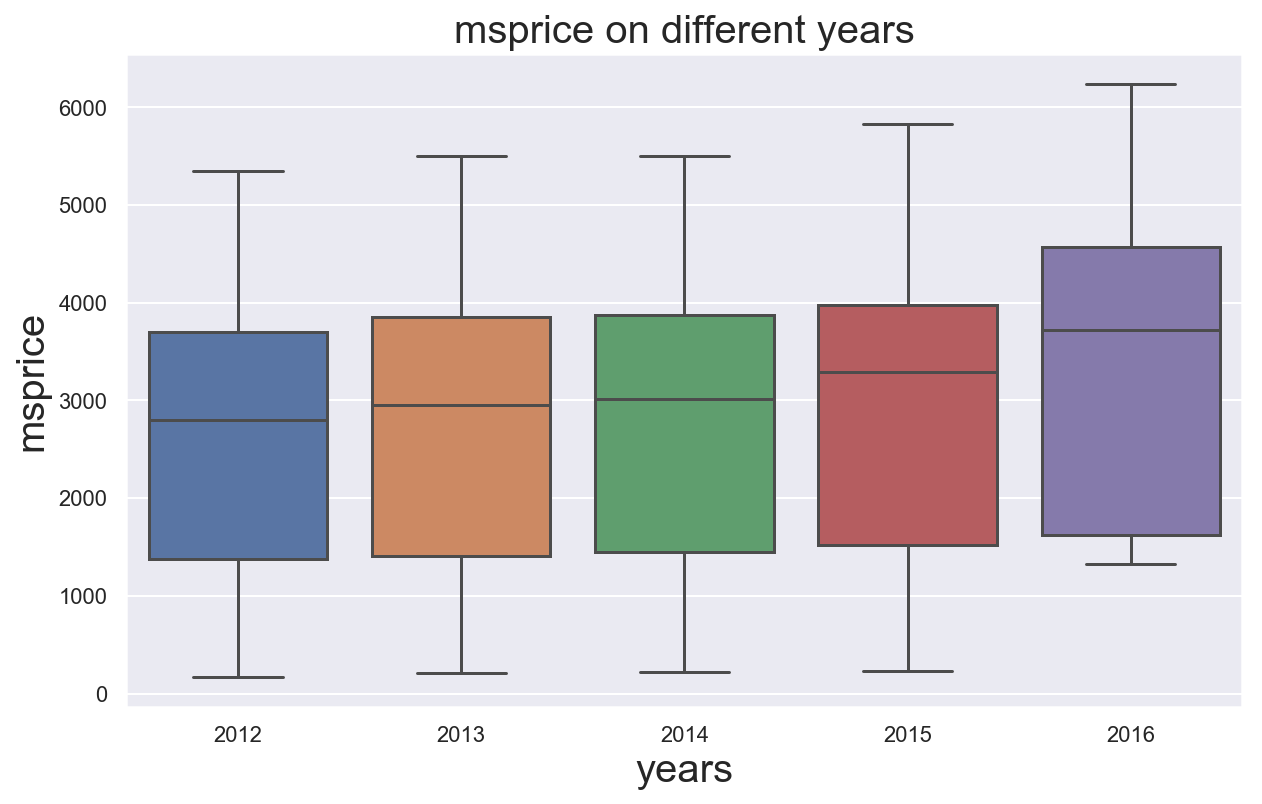

In [24]:
# Plot the Box Plot
ax = (sns.boxplot(x = 'year', y = 'msprice', data = cmo_yearly))
ax.set_title("msprice on different years", fontsize=20)
ax.set_xlabel("years", fontsize=20)
ax.set_ylabel("msprice", fontsize=20)

We can see that every year from 2012 to 2016 there is increase in the mid-value of the box plot i.e. median.

So, <i>how to deal with the missing values</i>?

There are three common ways:
- Deleting rows/observations contain missing values.
- Replacing with Mean/Median/Mode
- Predicting the missing values

Now, let's see what solution is perfect for our model.

In [25]:
cmo_yearly.groupby(['year']).msprice.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,31.00000,2630.96774,1357.67719,170.00000,1375.00000,2800.00000,3700.00000,5350.00000
2013,31.00000,2743.87097,1394.39695,210.00000,1412.50000,2950.00000,3850.00000,5500.00000
2014,31.00000,2784.67742,1402.98606,220.00000,1450.00000,3020.00000,3875.00000,5500.00000
2015,30.00000,2907.50000,1470.71221,230.00000,1525.00000,3295.00000,3972.50000,5830.00000
2016,21.00000,3278.80952,1600.37722,1330.00000,1625.00000,3725.00000,4575.00000,6240.00000


In [26]:
cmo_yearly[(cmo_yearly['year'] == 2016) & (cmo_yearly['Type'] == 'Rabi Crops')]

,commodity,year,Type,msprice
142,WHEAT(HUSKED),2016,Rabi Crops,nan
143,WHEAT(UNHUSKED),2016,Rabi Crops,nan
144,BARLI,2016,Rabi Crops,nan
145,Gram_Yellow,2016,Rabi Crops,nan
146,Masur_Yellow,2016,Rabi Crops,nan
147,MUSTARD,2016,Rabi Crops,nan
148,SAFFLOWER,2016,Rabi Crops,nan
149,Toria_Yellow,2016,Rabi Crops,nan


All values of 2016 year and Rabi Crops type are missing. So, there is no way we can replace it with anyone. So we simply remove it from our dataset. Let's talk about the rest two of them.

In [27]:
cmo_yearly[(cmo_yearly['commodity'] == 'Soyabean_Black') & (cmo_yearly['Type'] == 'Kharif Crops')]

,commodity,year,Type,msprice
14,Soyabean_Black,2012,Kharif Crops,2200.00000
45,Soyabean_Black,2013,Kharif Crops,2500.00000
76,Soyabean_Black,2014,Kharif Crops,2500.00000
107,Soyabean_Black,2015,Kharif Crops,nan
138,Soyabean_Black,2016,Kharif Crops,nan


As we see that at 2013 and 2014 the msprice remains same. So we can assume that in future years i.e. 2015 and 2016 the value of msprice either remain same or increase or decrease. As we don't know the exactly what happened. So, it's good to remove the null value observations from the dataset.

In [28]:
new_cmo_yearly = cmo_yearly.dropna()
new_cmo_yearly.isna().sum()

commodity    0
year         0
Type         0
msprice      0
dtype: int64

Now we can see that we are having no missing values present inside out dataset.

We need to see the trend in different commodities with having year on x-axis. So, for that we need to make year as the index of our dataframe.

In [29]:
new_cmo_yearly['year'] = pd.to_datetime(new_cmo_yearly.year, format='%Y', errors='ignore')
new_cmo_yearly.set_index('year', inplace = True)

C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
# # Commodities
def commodity(commodity_name):
    try:
        return new_cmo_yearly[new_cmo_yearly['commodity'] == commodity_name]
    except:
        print("Commodity name does not exist")

In [31]:
# # List out unique commodities
uniq_commodities = new_cmo_yearly['commodity'].unique()

Let's visualize first commodity.

In [32]:
paddy = commodity(uniq_commodities[0])
paddy

,commodity,Type,msprice
year,,,
2012-01-01,PADDY-UNHUSKED,Kharif Crops,1250.00000
2013-01-01,PADDY-UNHUSKED,Kharif Crops,1310.00000
2014-01-01,PADDY-UNHUSKED,Kharif Crops,1360.00000
2015-01-01,PADDY-UNHUSKED,Kharif Crops,1410.00000
2016-01-01,PADDY-UNHUSKED,Kharif Crops,1470.00000


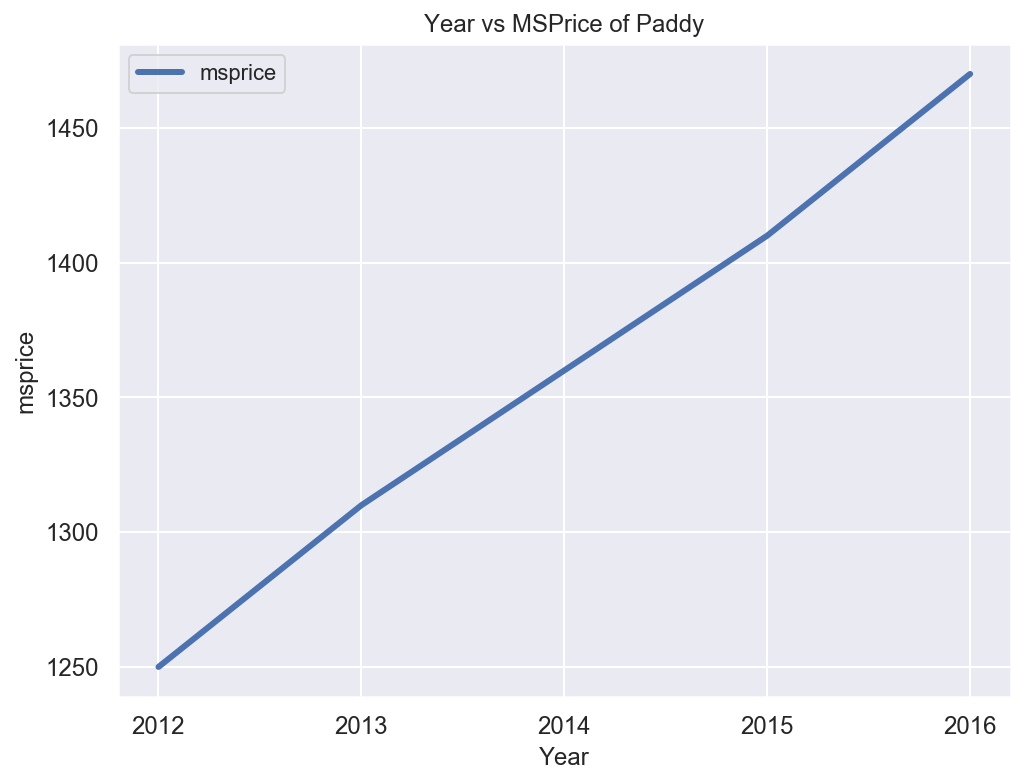

In [33]:
ax = paddy.plot(figsize = (8,6), linewidth = 3, fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('msprice', fontsize = 12)
ax.set_title('Year vs MSPrice of Paddy', fontsize = 12)

This shows us an upward positive trend of <i>PADDY-UNHUSKED</i> commodity with time.

Now in the similar way plot for different commodities.

In [34]:
# Final function to plot the trend
def commodity_trend(commodity_name):
    try:
        data = commodity(commodity_name)
        ax = data.plot(figsize = (8, 6), linewidth = 3, fontsize = 12)
        ax.set_xlabel('Year', fontsize = 12)
        ax.set_ylabel('msprice', fontsize = 12)
        ax.set_title(('Year vs MSPrice of ' + commodity_name), fontsize = 12)
    except:
        print("Commodity name does not exist.")

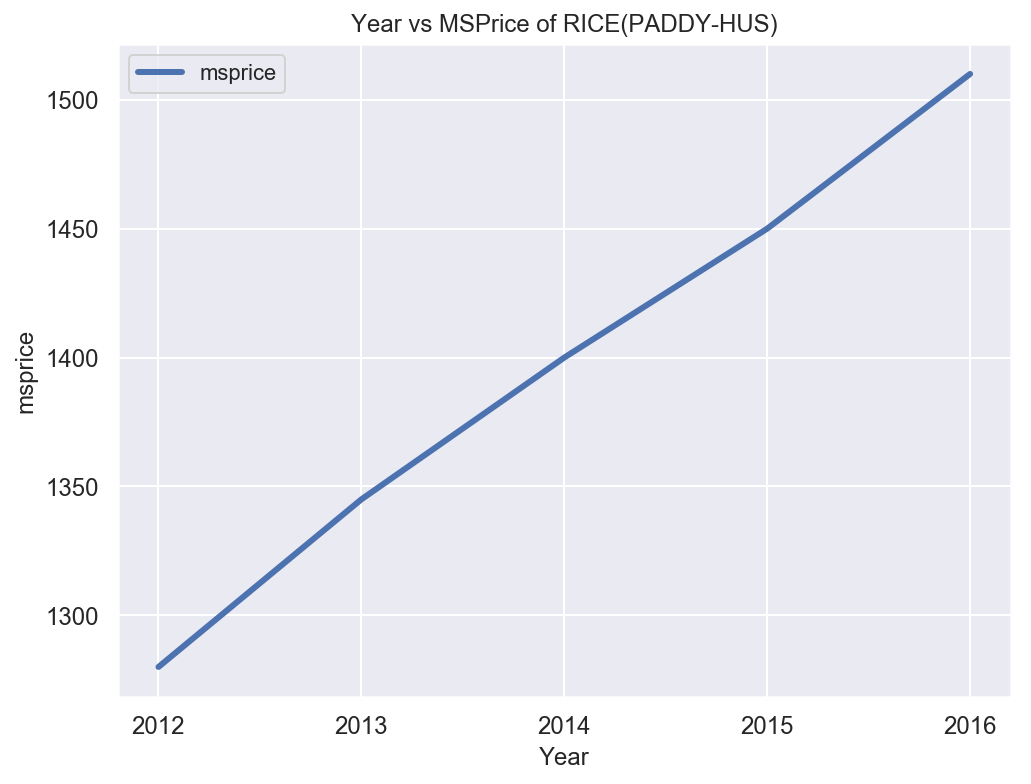

In [35]:
commodity_trend(uniq_commodities[1])

This also show us the upward trend.

#### Let's Check out Yearly Trens in Some More Commodities

In [36]:
uniq_commodities[5]

'MAIZE'

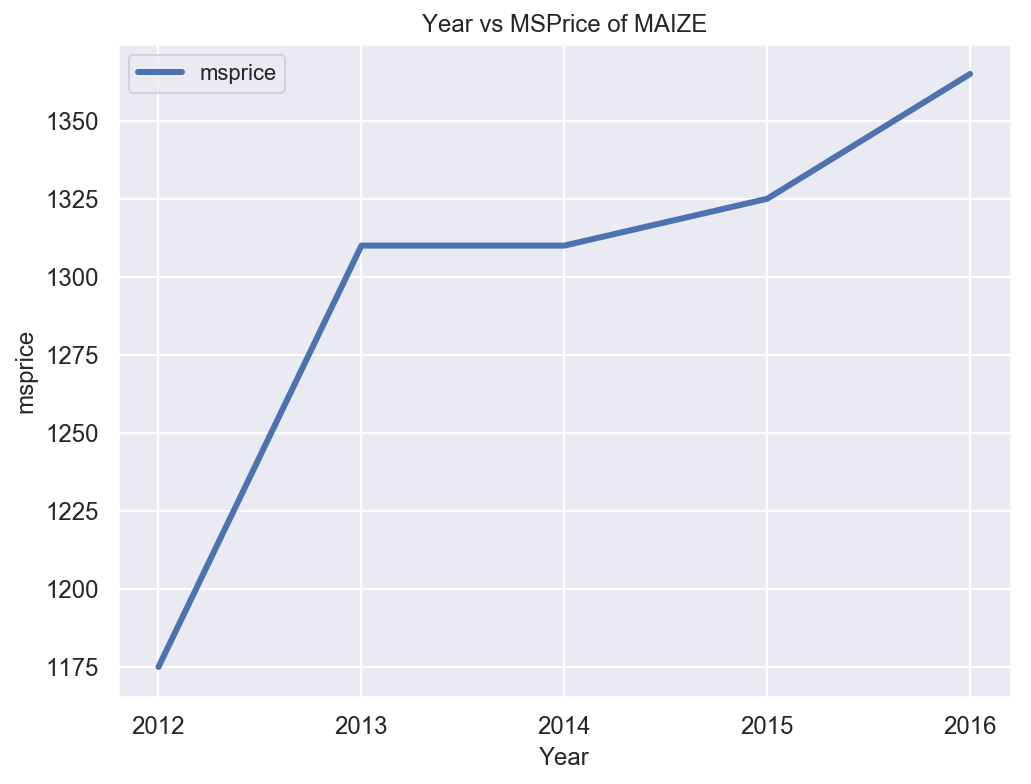

In [37]:
commodity_trend(commodity_name = "MAIZE")

In [38]:
uniq_commodities[12]

'GR.NUT KERNELS'

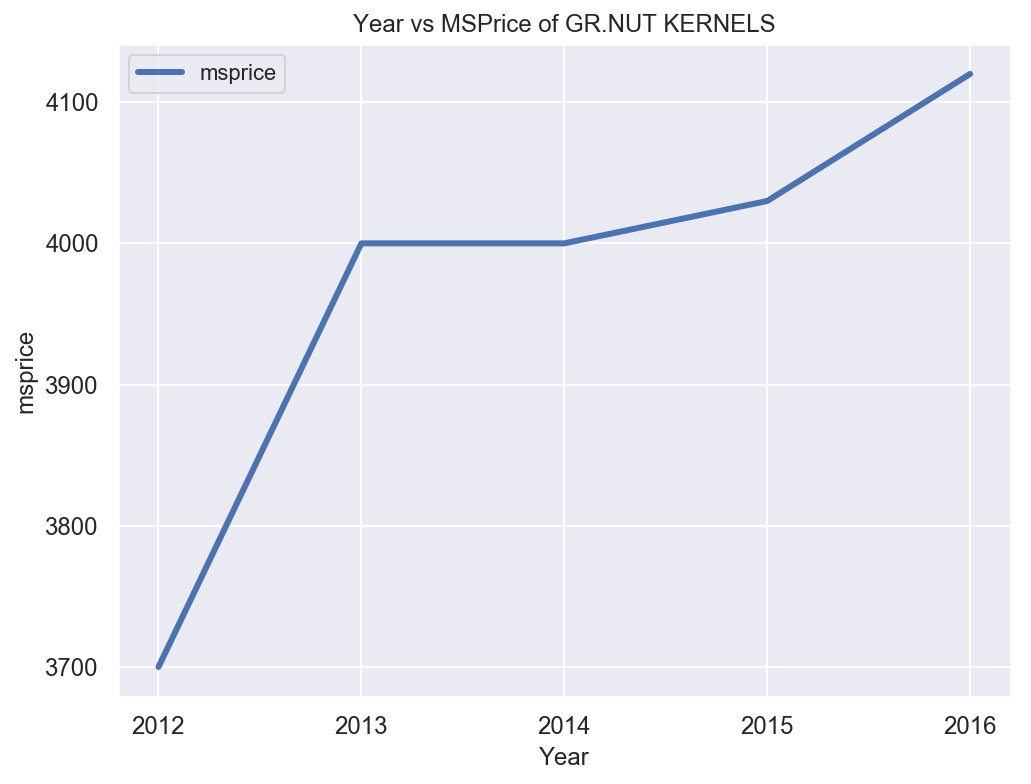

In [39]:
commodity_trend('GR.NUT KERNELS')

In [40]:
uniq_commodities[30]

'SUGAR-CANE'

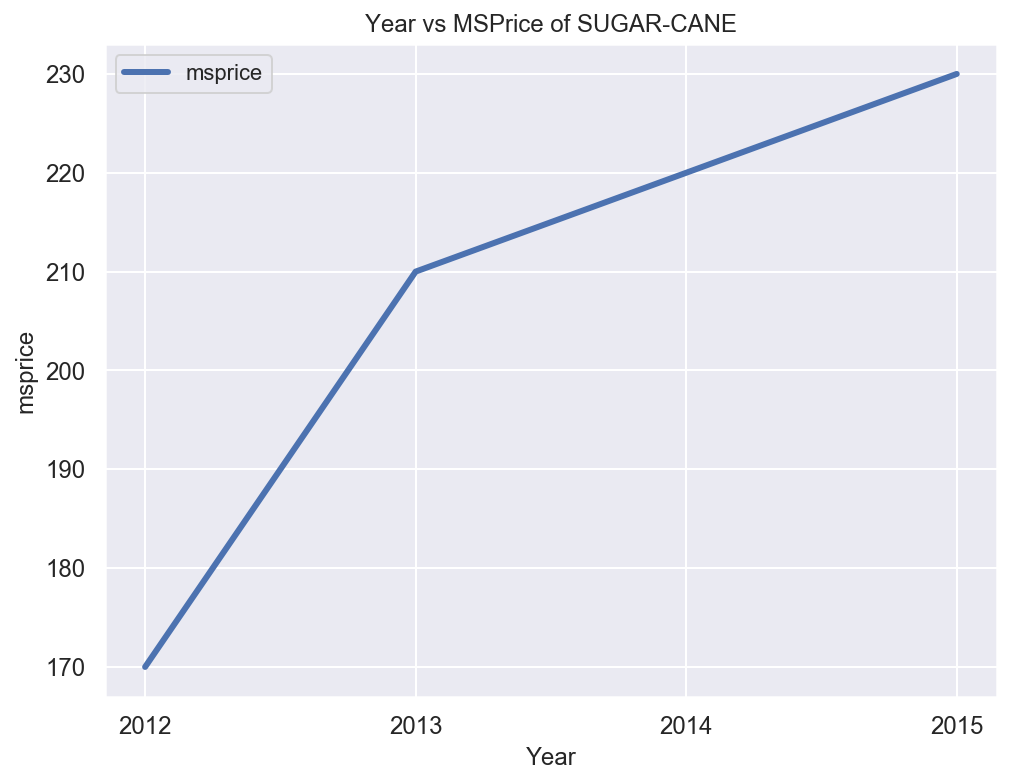

In [41]:
commodity_trend('SUGAR-CANE')

#### Now you can check the trend of different commodities using below function:
- commodity_trend(commodity_name)

If the commodity name doe not matches then it will show you that <i>Commodity name does not exist.</i>